<a href="https://colab.research.google.com/github/MinJunJA/dacon/blob/master/%EC%83%88%EC%88%9CPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder   
from sklearn.decomposition import PCA

In [13]:
train = pd.read_csv('/content/drive/MyDrive/ggg/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ggg/test.csv')

In [14]:
train = train[train.columns.drop(list(train.filter(regex='엽록소')))]
train.head()

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,...,2022-11-19 새순,2022-11-20 새순,2022-11-21 새순,2022-11-22 새순,2022-11-23 새순,2022-11-24 새순,2022-11-25 새순,2022-11-26 새순,2022-11-27 새순,2022-11-28 새순
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,...,0.9,0.8,0.8,0.8,0.7,0.7,0.7,0.7,0.7,0.6
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,...,0.7,0.7,0.6,0.6,0.6,0.5,0.0,0.0,0.0,0.0
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,3.0,2.9,2.9,2.9,...,0.8,0.8,0.7,0.7,0.7,0.7,0.6,0.6,0.6,0.5
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,3.1,3.0,3.0,3.0,...,0.9,0.9,0.9,0.8,0.8,0.8,0.8,0.7,0.7,0.7
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,3.7,3.6,3.6,3.6,...,0.9,0.9,0.8,0.8,0.8,0.7,0.7,0.7,0.6,0.6


In [16]:
train = train.drop(['착과량(int)','수고(m)','수관폭1(min)','수관폭2(max)','수관폭평균'], axis = 1)

In [19]:
train = train.drop(['ID'], axis = 1)

In [20]:
train.head()

,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,2022-09-06 새순,2022-09-07 새순,2022-09-08 새순,2022-09-09 새순,2022-09-10 새순,...,2022-11-19 새순,2022-11-20 새순,2022-11-21 새순,2022-11-22 새순,2022-11-23 새순,2022-11-24 새순,2022-11-25 새순,2022-11-26 새순,2022-11-27 새순,2022-11-28 새순
0,2.8,2.8,2.7,2.7,2.7,2.7,2.6,2.6,2.6,2.6,...,0.9,0.8,0.8,0.8,0.7,0.7,0.7,0.7,0.7,0.6
1,3.3,3.3,3.3,3.2,3.2,3.1,3.1,3.1,3.0,3.0,...,0.7,0.7,0.6,0.6,0.6,0.5,0.0,0.0,0.0,0.0
2,3.0,2.9,2.9,2.9,2.9,2.8,2.8,2.8,2.8,2.7,...,0.8,0.8,0.7,0.7,0.7,0.7,0.6,0.6,0.6,0.5
3,3.1,3.0,3.0,3.0,3.0,2.9,2.9,2.9,2.8,2.8,...,0.9,0.9,0.9,0.8,0.8,0.8,0.8,0.7,0.7,0.7
4,3.7,3.6,3.6,3.6,3.5,3.5,3.5,3.4,3.4,3.3,...,0.9,0.9,0.8,0.8,0.8,0.7,0.7,0.7,0.6,0.6


In [21]:
x = train.values
x = StandardScaler().fit_transform(x)

In [23]:
features = train.columns

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_array = pca.fit_transform(x)

In [26]:
pca_df = pd.DataFrame(pca_array,columns = ["PCA"+str(i+1) for i in list(range(0,2))])
pca_df

,PCA1,PCA2
0,11.958017,1.086504
1,6.670798,10.578277
2,10.042124,3.455791
3,7.230745,-3.252047
4,0.622205,-2.289814
...,...,...
2202,-9.024632,1.522267
2203,7.967929,-0.961173
2204,10.017448,3.652669
2205,-0.360688,2.000154


In [27]:
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)' : pca.explained_variance_, '기여율':pca.explained_variance_ratio_},
                      index = np.array([f"pca{num+1}" for num in range(pca_df.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,74.915927,0.841371,0.841371
pca2,9.453317,0.106169,0.947540


In [28]:
loadings = pca.components_
num_pca = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pca+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = train.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2
variable,,
2022-09-01 새순,-0.114830,0.030839
2022-09-02 새순,-0.114820,0.031318
2022-09-03 새순,-0.114866,0.030165
2022-09-04 새순,-0.114853,0.030345
2022-09-05 새순,-0.114873,0.029958
...,...,...
2022-11-24 새순,0.060358,-0.234335
2022-11-25 새순,0.056758,-0.215814
2022-11-26 새순,0.064114,-0.205094


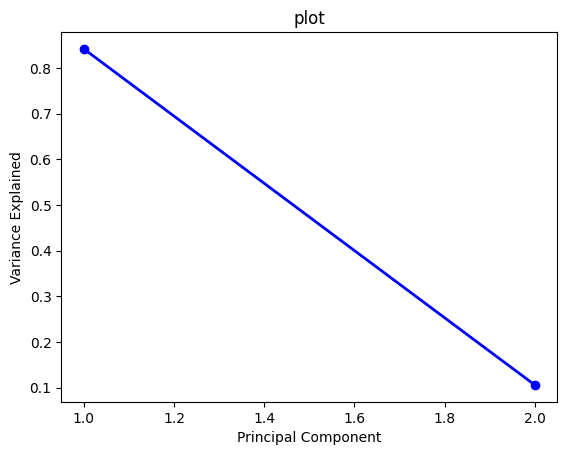

In [29]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()